In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt

import pandas as pd
from datetime import datetime

import os
import ipywidgets as widgets

import tkinter as tk
from tkinter import filedialog as fd

In [2]:
# open file dialog
root = tk.Tk()
root.attributes('-topmost', True)
root.iconify()
file_name = fd.askopenfilename(parent=root, filetypes=[(".shp", ".shp")])
root.destroy()

In [3]:
file_name

'D:/BISMARK/GESTION_2023/_CATASTRO/CATASTRO_2023-01-25.shp'

In [4]:
# leer el .shp seleccionado
data = gpd.read_file(file_name)

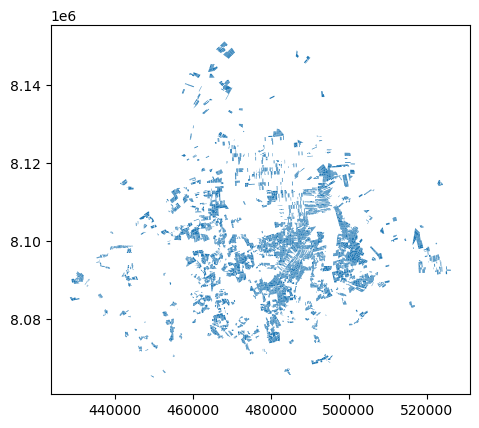

In [5]:
data.plot()
plt.show()

In [6]:
data.head(3)

,id,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
0,00005600000L1.3,560,L1.3,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2018-05-30,FY,IAG,4,canha,79,0.77,"POLYGON Z ((491741.706 8084531.788 0.000, 4916..."
1,00005600000L1.5,560,L1.5,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,UCG_90-20,2011-05-20,FY,None,11,canha,79,3.83,"POLYGON Z ((491971.566 8084838.542 0.000, 4920..."
2,00005600000L2.2,560,L2.2,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,CITTCA_85-22,2018-05-20,FY,IAG,4,canha,79,2.25,"POLYGON Z ((492266.427 8084941.630 0.000, 4923..."


In [7]:
data.crs.name

'WGS 84 / UTM zone 20S'

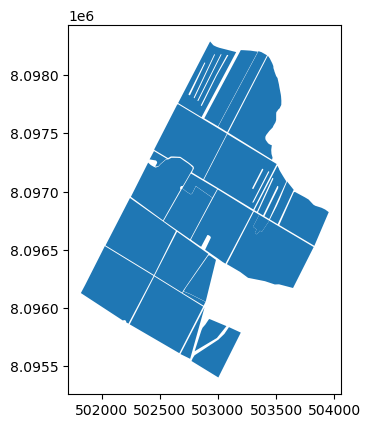

In [9]:
propiedad = data[data['unidad_01']==259]
propiedad.plot()
plt.show()

In [10]:
def quitar_caracteres(text):
    text = text.replace('_', ' ')
    text = text.replace('"', '')
    text = text.replace('.', '')
    return text

In [11]:
propiedad.head(3)

,id,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,variedad,fs,textura,financia,soca,cultivo,zona,area,geometry
222,00002590000L6,259,L6,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,UCG_90-20,2018-04-10,FY,IAG,4,canha,50,0.85,"POLYGON Z ((502460.228 8097214.480 0.000, 5024..."
223,00002590000L12.1,259,L12.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-28,FY,IAG,4,canha,50,10.86,"POLYGON Z ((503528.211 8096714.163 0.000, 5036..."
224,00002590000L13.1,259,L13.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-30,FY,IAG,4,canha,50,6.38,"POLYGON Z ((503002.471 8097559.099 0.000, 5033..."


In [12]:
file_name = str(propiedad.iloc[0]['unidad_01']) + '_' + propiedad.iloc[0]['unidad_02']
file_name

'259_SANTA_ANA_DE_PAILON'

In [13]:
propiedad = propiedad.rename(columns={'id':'cod', 'variedad':'var', 'textura':'tex'})
propiedad.head(5)

,cod,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,var,fs,tex,financia,soca,cultivo,zona,area,geometry
222,00002590000L6,259,L6,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,UCG_90-20,2018-04-10,FY,IAG,4,canha,50,0.85,"POLYGON Z ((502460.228 8097214.480 0.000, 5024..."
223,00002590000L12.1,259,L12.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-28,FY,IAG,4,canha,50,10.86,"POLYGON Z ((503528.211 8096714.163 0.000, 5036..."
224,00002590000L13.1,259,L13.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-30,FY,IAG,4,canha,50,6.38,"POLYGON Z ((503002.471 8097559.099 0.000, 5033..."
225,00002590000L17,259,L17,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RB-2,2017-07-06,FY,None,5,canha,50,10.13,"POLYGON Z ((502760.782 8096588.508 0.000, 5025..."
226,00002590000L15,259,L15,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2017-07-05,FY,None,5,canha,50,5.24,"POLYGON Z ((502931.291 8096448.952 0.000, 5029..."


In [14]:
num_columnas = len(propiedad.columns)
num_columnas

15

In [15]:
propiedad['NOM_LOTE'] = propiedad['unidad_05']
propiedad['TEXTURA'] = propiedad['tex']
propiedad['SUPERFICIE'] = propiedad['area']
propiedad['VARIEDAD'] = propiedad['var']
propiedad['FECHA_SIEM'] = propiedad['fs']
propiedad['CORTE'] = propiedad['soca']
propiedad['ESTADO'] = ''
propiedad['RENDIMIENT'] = 0
propiedad['COD_CA'] = propiedad['unidad_03']
propiedad['COD_PROP'] = propiedad['unidad_01']
propiedad['ID'] = propiedad['cod']
propiedad['CUADRANTE'] = 0

In [16]:
propiedad.head(3)

,cod,unidad_01,unidad_05,unidad_02,unidad_03,unidad_04,var,fs,tex,financia,...,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,00002590000L6,259,L6,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,UCG_90-20,2018-04-10,FY,IAG,...,0.85,UCG_90-20,2018-04-10,4,,0,5500,259,00002590000L6,0
223,00002590000L12.1,259,L12.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-28,FY,IAG,...,10.86,RBB_77-26,2018-04-28,4,,0,5500,259,00002590000L12.1,0
224,00002590000L13.1,259,L13.1,SANTA_ANA_DE_PAILON,5500,HURTADO_MENDEZ_ALEJANDRO,RBB_77-26,2018-04-30,FY,IAG,...,6.38,RBB_77-26,2018-04-30,4,,0,5500,259,00002590000L13.1,0


In [17]:
propiedad.columns

Index(['cod', 'unidad_01', 'unidad_05', 'unidad_02', 'unidad_03', 'unidad_04',
       'var', 'fs', 'tex', 'financia', 'soca', 'cultivo', 'zona', 'area',
       'geometry', 'NOM_LOTE', 'TEXTURA', 'SUPERFICIE', 'VARIEDAD',
       'FECHA_SIEM', 'CORTE', 'ESTADO', 'RENDIMIENT', 'COD_CA', 'COD_PROP',
       'ID', 'CUADRANTE'],
      dtype='object')

In [18]:
propiedad = propiedad.iloc[:,num_columnas-1:]

In [19]:
propiedad.head(5)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,"POLYGON Z ((502460.228 8097214.480 0.000, 5024...",L6,FY,0.85,UCG_90-20,2018-04-10,4,,0,5500,259,00002590000L6,0
223,"POLYGON Z ((503528.211 8096714.163 0.000, 5036...",L12.1,FY,10.86,RBB_77-26,2018-04-28,4,,0,5500,259,00002590000L12.1,0
224,"POLYGON Z ((503002.471 8097559.099 0.000, 5033...",L13.1,FY,6.38,RBB_77-26,2018-04-30,4,,0,5500,259,00002590000L13.1,0
225,"POLYGON Z ((502760.782 8096588.508 0.000, 5025...",L17,FY,10.13,RB-2,2017-07-06,5,,0,5500,259,00002590000L17,0
226,"POLYGON Z ((502931.291 8096448.952 0.000, 5029...",L15,FY,5.24,RBB_77-26,2017-07-05,5,,0,5500,259,00002590000L15,0


In [20]:
# dependiendo del año de la fecha de siembra, retorna 'HOJA', 'SOCA' o 'RENOVACION'
def establecer_estado(fecha):
    date = str(fecha)
    try:
        date = datetime.strptime(date, '%Y-%m-%d')
        year = date.year
        if year == 2022:
            return 'HOJA'
        else:
            return 'SOCA'
    except Exception as ex:
        return 'RENOVACION'

In [21]:
def establecer_formato_fecha(fecha):
    fecha = str(fecha)
    if fecha == 'None':
        return '0'
    else:
        return fecha.replace('-', '')

In [22]:
propiedad['ESTADO'] = propiedad['FECHA_SIEM'].apply(establecer_estado)
propiedad['FECHA_SIEM'] = propiedad['FECHA_SIEM'].apply(establecer_formato_fecha)

In [23]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,"POLYGON Z ((502460.228 8097214.480 0.000, 5024...",L6,FY,0.85,UCG_90-20,20180410,4,SOCA,0,5500,259,00002590000L6,0
223,"POLYGON Z ((503528.211 8096714.163 0.000, 5036...",L12.1,FY,10.86,RBB_77-26,20180428,4,SOCA,0,5500,259,00002590000L12.1,0
224,"POLYGON Z ((503002.471 8097559.099 0.000, 5033...",L13.1,FY,6.38,RBB_77-26,20180430,4,SOCA,0,5500,259,00002590000L13.1,0
225,"POLYGON Z ((502760.782 8096588.508 0.000, 5025...",L17,FY,10.13,RB-2,20170706,5,SOCA,0,5500,259,00002590000L17,0
226,"POLYGON Z ((502931.291 8096448.952 0.000, 5029...",L15,FY,5.24,RBB_77-26,20170705,5,SOCA,0,5500,259,00002590000L15,0


In [24]:
fp_tch = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\RENDIMIENTO AVANCE 071022.xlsx'

In [25]:
tchs = pd.read_excel(fp_tch)

In [26]:
tchs.head(3)

,COD_AVANCE,CODIGO CAÑERO,INS,NOMBRE CAÑERO,DESSIG,CREA,COMPROMISO GRUPAL,COMPROMISO INDIVIDUAL,HA CANHA POR GRUPO,HA CANHA INDIVIDUAL,...,TN ENTREGADAS INDIVIDUAL,% ENTREGA GRUPAL,HA COSECHA GRUPAL,HA COSECHA INDIVIDUAL,% COSECHA GRUPAL,RENDIMIENTO 2022,RENDIMIENTO 2021,ESTIMATIVA RENDIMIENTO 2022,OBSERVACIONES,Unnamed: 20
0,131_1,2224,NaN,CRUZ VARGAS WILLY WALDO,NaN,NaN,7067.07,0.00,NaN,NaN,...,42.86,0.000000,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN
1,81_36,41555,81.0,FRANCO GUZMAN CARLA DANIELA,NaN,NaN,7053.98,7053.98,0.0,0.0,...,7138.06,1.011920,0.0,0.0,NaN,NaN,0.000000,59.896088,SIN CATASTRO,NaN
2,50_29,15501,50.0,WENDE RIOJA MAURICIO,NaN,NaN,4525.38,4525.38,0.0,0.0,...,3537.96,0.781804,0.0,0.0,NaN,NaN,39.153575,0.000000,SIN CATASTRO,NaN


In [27]:
def cargar_tch(cod_ca):
    tch = float(tchs[tchs['CODIGO CAÑERO'] == cod_ca].iloc[:,16])
    try:
        tch_float = float(tch)
        return tch_float
    except:
        return 0

In [28]:
#CONVERTIR LOS TIPOS DE VARIABLE
propiedad = propiedad.astype({
    'RENDIMIENT':'float',
    'COD_CA':'int'
})

In [29]:
propiedad['RENDIMIENT'] = propiedad['COD_CA'].apply(cargar_tch)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,"POLYGON Z ((502460.228 8097214.480 0.000, 5024...",L6,FY,0.85,UCG_90-20,20180410,4,SOCA,81.522034,5500,259,00002590000L6,0
223,"POLYGON Z ((503528.211 8096714.163 0.000, 5036...",L12.1,FY,10.86,RBB_77-26,20180428,4,SOCA,81.522034,5500,259,00002590000L12.1,0
224,"POLYGON Z ((503002.471 8097559.099 0.000, 5033...",L13.1,FY,6.38,RBB_77-26,20180430,4,SOCA,81.522034,5500,259,00002590000L13.1,0


In [30]:
fp_bloques = r'D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\BLOQUES.xlsx'

In [31]:
bloques = pd.read_excel(fp_bloques)

In [32]:
bloques.head(3)

,idnax,id,unidad_01,unidad_02,unidad_03,unidad_04,unidad_05,variedad,fs,fc,...,agua_disp,agua_aprov,agua_act,estrato,tipo_cos,resiembra_pct,fk_pixel,activo,fk_estacion,inicio_curva
0,276044,00005600000L1.3,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.3,UCG_90-20,44038,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
1,276045,00005600000L1.5,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L1.5,UCG_90-20,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN
2,276046,00005600000L2.2,560,LA_TUJA_IAG_SA,15284,ROJAS_CORDOVA_ROGELIO_FELIPE,L2.2,CITTCA_85-22,44431,44431.0,...,NaN,NaN,NaN,NaN,NaN,NaN,618227,True,NaN,NaN


In [33]:
def cargar_bloque(cod_prop):
    bloque = bloques[bloques['unidad_01']==cod_prop].head(1).loc[:,'cuadrante']
    try:
        bloque_int = int(bloque)
        return bloque_int
    except:
        return 0

In [34]:
propiedad['CUADRANTE']=propiedad['COD_PROP'].apply(cargar_bloque)
propiedad.head(3)

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,"POLYGON Z ((502460.228 8097214.480 0.000, 5024...",L6,FY,0.85,UCG_90-20,20180410,4,SOCA,81.522034,5500,259,00002590000L6,358
223,"POLYGON Z ((503528.211 8096714.163 0.000, 5036...",L12.1,FY,10.86,RBB_77-26,20180428,4,SOCA,81.522034,5500,259,00002590000L12.1,358
224,"POLYGON Z ((503002.471 8097559.099 0.000, 5033...",L13.1,FY,6.38,RBB_77-26,20180430,4,SOCA,81.522034,5500,259,00002590000L13.1,358


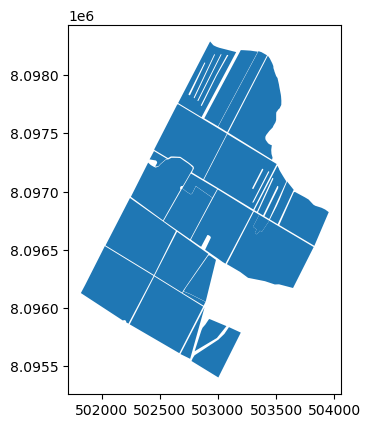

In [35]:
propiedad.plot()
plt.show()

In [36]:
#quitar_caracteres
propiedad['VARIEDAD'] = propiedad['VARIEDAD'].apply(quitar_caracteres)

In [37]:
propiedad.head()

,geometry,NOM_LOTE,TEXTURA,SUPERFICIE,VARIEDAD,FECHA_SIEM,CORTE,ESTADO,RENDIMIENT,COD_CA,COD_PROP,ID,CUADRANTE
222,"POLYGON Z ((502460.228 8097214.480 0.000, 5024...",L6,FY,0.85,UCG 90-20,20180410,4,SOCA,81.522034,5500,259,00002590000L6,358
223,"POLYGON Z ((503528.211 8096714.163 0.000, 5036...",L12.1,FY,10.86,RBB 77-26,20180428,4,SOCA,81.522034,5500,259,00002590000L12.1,358
224,"POLYGON Z ((503002.471 8097559.099 0.000, 5033...",L13.1,FY,6.38,RBB 77-26,20180430,4,SOCA,81.522034,5500,259,00002590000L13.1,358
225,"POLYGON Z ((502760.782 8096588.508 0.000, 5025...",L17,FY,10.13,RB-2,20170706,5,SOCA,81.522034,5500,259,00002590000L17,358
226,"POLYGON Z ((502931.291 8096448.952 0.000, 5029...",L15,FY,5.24,RBB 77-26,20170705,5,SOCA,81.522034,5500,259,00002590000L15,358


In [38]:
propiedad.crs

<Projected CRS: EPSG:32720>
Name: WGS 84 / UTM zone 20S
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: Between 66°W and 60°W, southern hemisphere between 80°S and equator, onshore and offshore. Argentina. Bolivia. Brazil. Falkland Islands (Malvinas). Paraguay.
- bounds: (-66.0, -80.0, -60.0, 0.0)
Coordinate Operation:
- name: UTM zone 20S
- method: Transverse Mercator
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [39]:
propiedad = propiedad.to_crs(epsg=4326)

In [40]:
propiedad.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [41]:
file_name + '.geojson'

'259_SANTA_ANA_DE_PAILON.geojson'

In [42]:
#file_name='d'

In [43]:
os.chdir(r"D:\OneDrive - Ingenio Azucarero Guabira S.A\UTEA_2022\APP CAÑERO\PROPIEDADES\DATOS_PARA_GENERAR_GEOJSON\PROPIEDADES_OFFICIALES")

In [44]:
out_dir = os.path.normpath((os.getcwd() + '/' + file_name + '.geojson' ))

In [45]:
out_dir

'D:\\OneDrive - Ingenio Azucarero Guabira S.A\\UTEA_2022\\APP CAÑERO\\PROPIEDADES\\DATOS_PARA_GENERAR_GEOJSON\\PROPIEDADES_OFFICIALES\\259_SANTA_ANA_DE_PAILON.geojson'

In [46]:
propiedad.to_file(out_dir, driver='GeoJSON')